Monte Carlo simulation for predicting future stock prices of Apple Inc. (AAPL). This code uses historical stock price data to simulate potential future prices.

In [1]:
pip install yfinance numpy pandas matplotlib


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Fetch historical stock data for Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-07-01')
close_prices = data['Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate daily returns
daily_returns = close_prices.pct_change().dropna()

In [5]:
# Statistical parameters
mean_return = daily_returns.mean()
std_return = daily_returns.std()

In [6]:
# Simulation parameters
num_simulations = 1000
num_days = 252


In [7]:
# Simulation function
def monte_carlo_simulation(start_price, mean_return, std_return, num_days, num_simulations):
    simulations = np.zeros((num_simulations, num_days))
    simulations[:, 0] = start_price

    for i in range(1, num_days):
        random_shocks = np.random.normal(loc=mean_return, scale=std_return, size=num_simulations)
        simulations[:, i] = simulations[:, i - 1] * (1 + random_shocks)

    return simulations

In [9]:
# Running the simulation
start_price = close_prices[-1]
simulations = monte_carlo_simulation(start_price, mean_return, std_return, num_days, num_simulations)

<ipython-input-9-90822e281651>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = close_prices[-1]


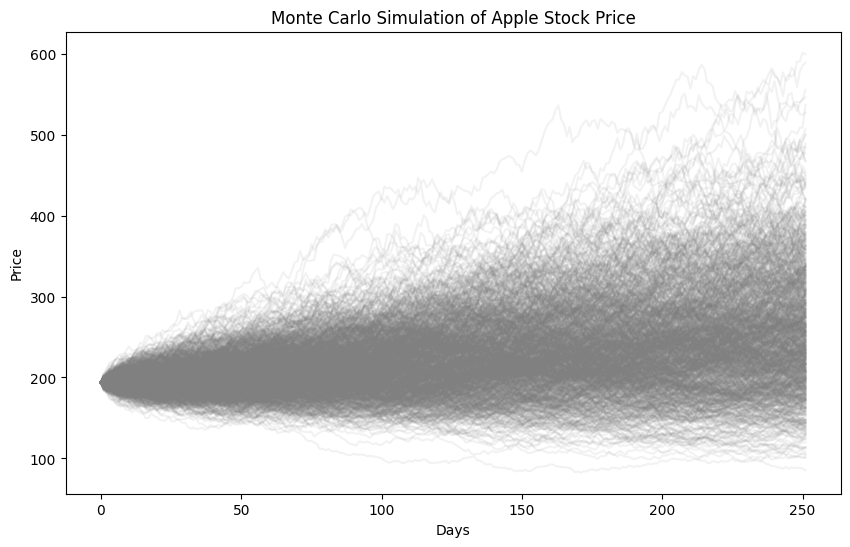

In [10]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, alpha=0.1, color='grey')
plt.title('Monte Carlo Simulation of Apple Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [12]:
# Summary statistics
final_prices = simulations[:, -1]
mean_final_price = np.mean(final_prices)
std_final_price = np.std(final_prices)


In [13]:
print(f"Mean final price after {num_days} days: ${mean_final_price:.2f}")
print(f"Standard deviation of final price: ${std_final_price:.2f}")

Mean final price after 252 days: $257.14
Standard deviation of final price: $76.96
